In [21]:
import numpy as np
import cv2
from tools import display_inline, display_multiple_inline, iterative_filter

### **Задание 1. Собель и пороговая карта краёв**

1. **Считать изображение** в градациях серого.  
2. **Вычислить градиенты** по x и y при помощи оператора Собеля (конволюция с ядрами \(K_x, K_y\)).  
3. **Построить карту модуля градиента** $(|\nabla I|)$.
4. **Применить порог** (например, 50 или 80) к этой карте, чтобы получить «краевую» бинарную маску.  
5. **Сравнить результат** с «сырым» изображением $(|\nabla I|)$ (до порога) и записать наблюдения.  

**Комментарий**:  
- Цель — понять, как Собель «подсвечивает» места резкого перепада, и что даёт бинаризация.  
- Обратите внимание на «толщину» краёв: без подавления немаксимумов линии могут быть «размытыми».  

In [8]:
path = 'example.jpg'
img = cv2.imread(path)
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

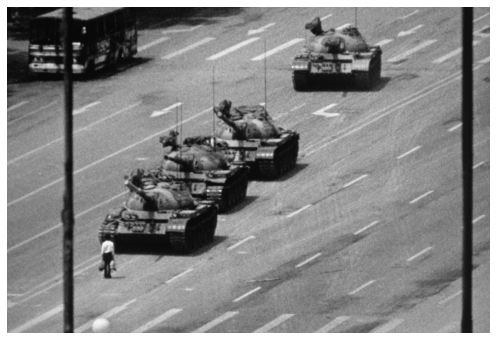

In [10]:
display_inline(img_grey)

In [42]:
def get_gx_gy(img):
    gX = cv2.Sobel(img, dx=1, dy=0, ddepth=cv2.CV_32F, ksize=3)
    gY = cv2.Sobel(img, dx=0, dy=1, ddepth=cv2.CV_32F, ksize=3)

    gX = cv2.convertScaleAbs(gX)
    gY = cv2.convertScaleAbs(gY)
    return [gX, gY]

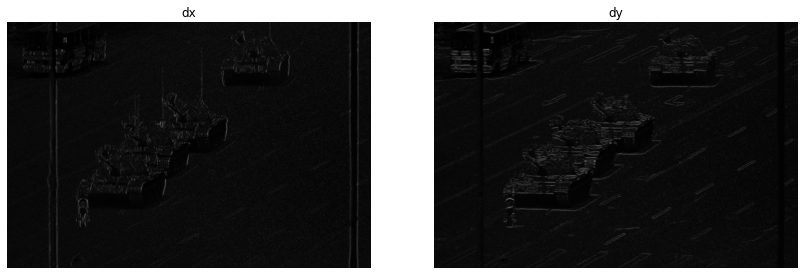

In [48]:
display_multiple_inline(get_gx_gy(img_grey), \
                        cols=2, \
                        base_sizes=(6,4), \
                        img_titles=['dx', 'dy'])

In [34]:
def add_weighted(img, **params):
    gX, gY = get_gx_gy(img)
    threshold1, threshold2 = params['threshold1'], params['threshold2']
    return cv2.addWeighted(gX, threshold1, gY, threshold2, 0)

In [35]:
thresholds = [{'threshold1':t1, 'threshold2':t2} for t1 in [0.5, 0.8] for t2 in [0.5, 0.8]]

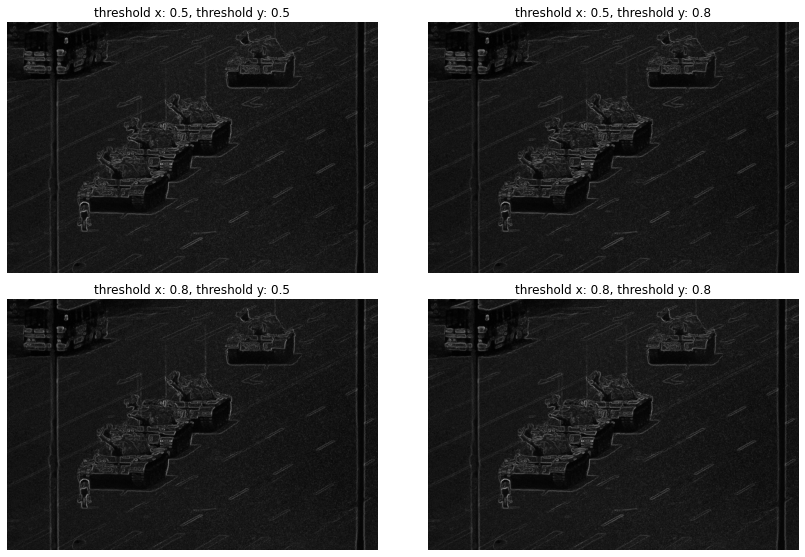

In [47]:
img_sobel = iterative_filter(img_grey, thresholds, add_weighted)

display_multiple_inline(img_sobel, \
                        cols=2, \
                        base_sizes=(6,4), \
                        img_titles=[f"threshold x: {comb['threshold1']}, threshold y: {comb['threshold2']}" \
                                    for comb in thresholds])

In [40]:
path = 'example2.jpg'
img2 = cv2.imread(path)
img2_grey = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

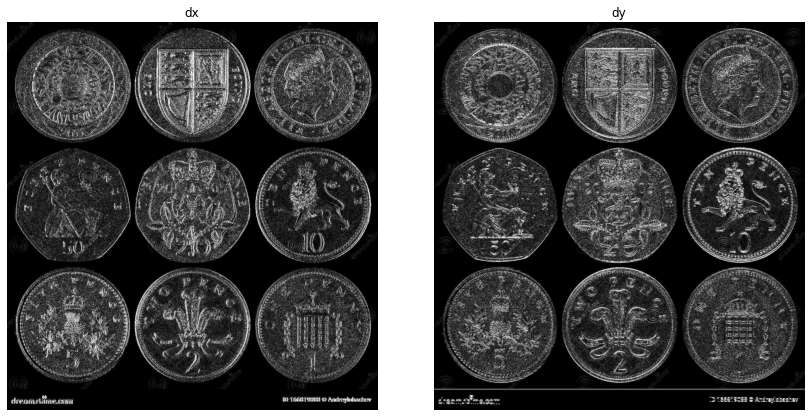

In [45]:
display_multiple_inline(get_gx_gy(img2_grey), \
                        cols=2, \
                        base_sizes=(6,6), \
                        img_titles=['dx', 'dy'])

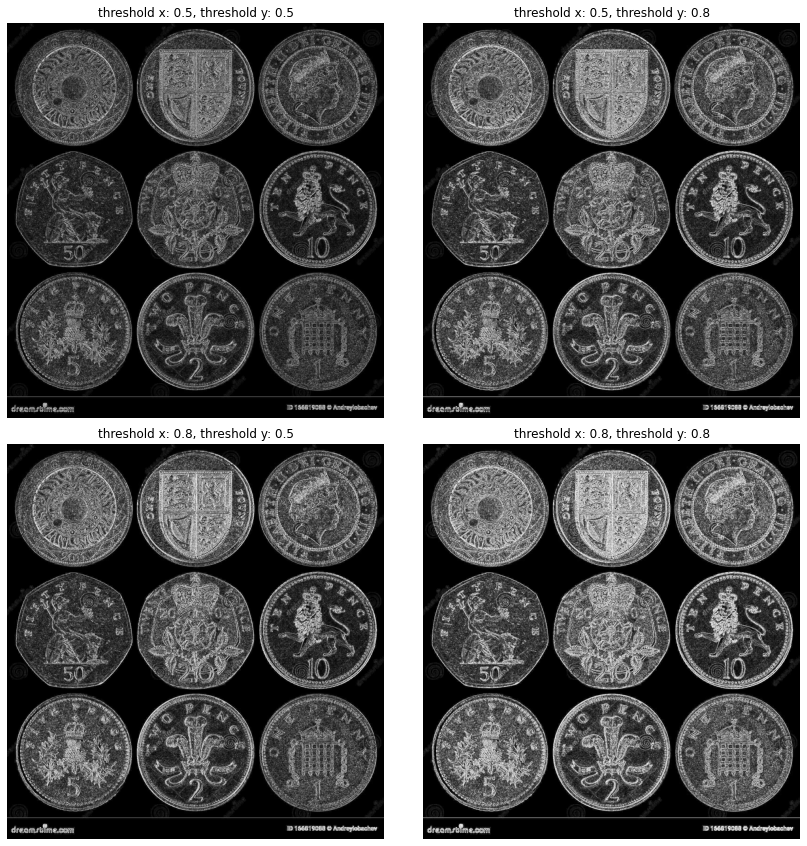

In [46]:
img2_sobel = iterative_filter(img2_grey, thresholds, add_weighted)

display_multiple_inline(img2_sobel, \
                        cols=2, \
                        base_sizes=(6,6), \
                        img_titles=[f"threshold x: {comb['threshold1']}, threshold y: {comb['threshold2']}" \
                                    for comb in thresholds])

### **Задание 2. Сравнить Собель и Canny**

1. Возьмите **то же изображение**, что в Задании 1.  
2. **Примените Canny** (например, `cv2.Canny(img, 50, 150)`), получите тонкую двоичную карту краёв.  
3. Сравните визуально с результатом **порогования** карты $(|\nabla I|)$ (из Задания 1).  
4. **Эксперимент:** поменяйте пороги Canny (`threshold1, threshold2` → (50,150), (80,160), (100,200)), посмотреть, как меняется итог.  

**Комментарий**:  
- Оцените, насколько «тоньше» линии у Canny, нет ли разрывов, не появляется ли лишний шум при неудачном выборе порогов.  
- Вывод: Собель проще, но даёт «толстые» линии; Canny комплекснее, но результат обычно аккуратнее.  

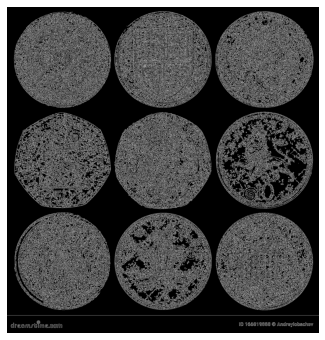

In [52]:
display_inline(cv2.Canny(img2_grey, 50, 150), grey=True)

In [58]:
def get_canny(img, **params):
    return cv2.Canny(img, **params)

In [61]:
thresholds = [{'threshold1':t1, 'threshold2':t2} for t1, t2 in ((50,150), (80,160), (100,200))]

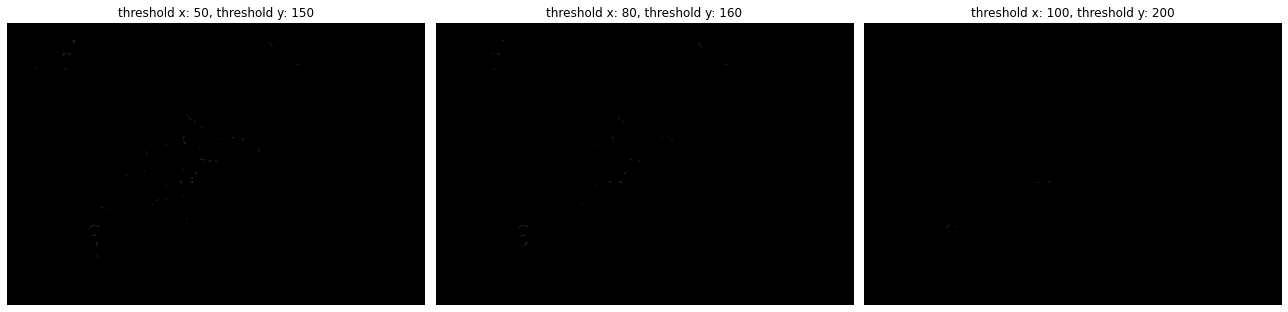

In [64]:
img_canny = iterative_filter(img_grey, thresholds, get_canny)

display_multiple_inline(img_canny, \
                        cols=3, \
                        base_sizes=(6,6), \
                        img_titles=[f"threshold x: {comb['threshold1']}, threshold y: {comb['threshold2']}" \
                                    for comb in thresholds])

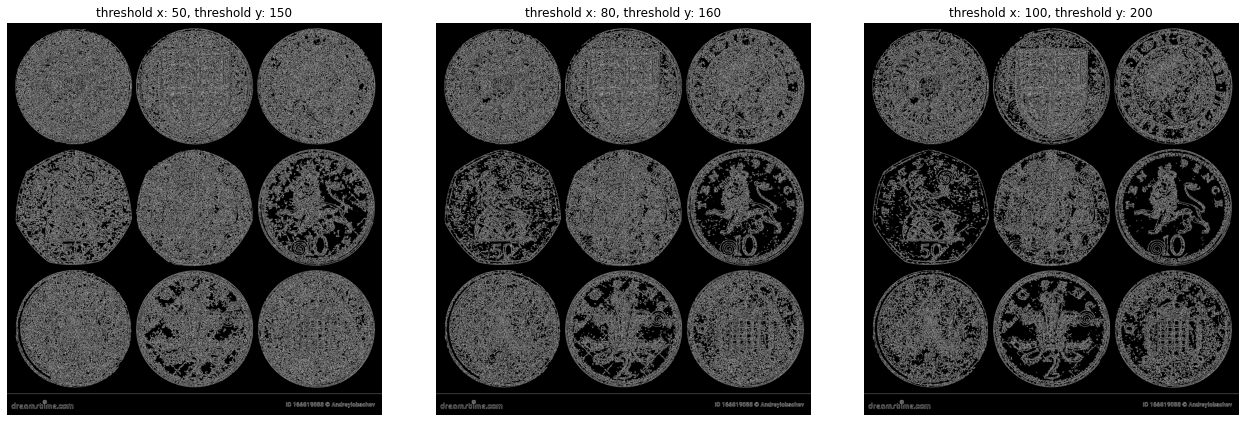

In [63]:
img2_canny = iterative_filter(img2_grey, thresholds, get_canny)

display_multiple_inline(img2_canny, \
                        cols=3, \
                        base_sizes=(6,6), \
                        img_titles=[f"threshold x: {comb['threshold1']}, threshold y: {comb['threshold2']}" \
                                    for comb in thresholds])